In [62]:
import pandas as pd
import numpy as np 
import random as rd 
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt 



In [63]:
# génération d'un dataset

genes =['gene'+ str(i) for i in range(1,101)]

wt= ['wt'+ str(i) for i in range(1,6)]
ko = ['ko'+str(i) for i in range(1,6)]


In [64]:
# création d'un dataframe

df= pd.DataFrame(columns=wt+ko, index=genes)

for gene in df.index:
    df.loc[gene,'wt1':'wt5']=np.random.poisson(lam=rd.randrange(10,1000), size=5)
    df.loc[gene,'ko1':'ko5']=np.random.poisson(lam=rd.randrange(10,1000), size=5)

display(df.head())
print(df.shape)



,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,334,362,374,361,376,79,82,89,96,85
gene2,810,838,825,814,775,681,618,646,629,671
gene3,871,843,814,861,840,479,498,511,501,474
gene4,587,603,584,587,623,632,591,567,566,557
gene5,155,179,172,201,163,1024,1021,1000,953,965


(100, 10)


In [65]:
# avant d'utiliser le PCA nous allons 'scale' les données:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_col = df.index
preprocessor = ColumnTransformer(
    transformers=[('num',StandardScaler(),num_col)]
)

scaled_df= preprocessor.fit_transform(df.T)

pca=PCA()

pca_data = pca.fit_transform(scaled_df)



In [66]:
# Déterminons le % de la varaince globale calculé pour chaque PC

pc_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(x) for x in range(1,len(pc_var)+1)]

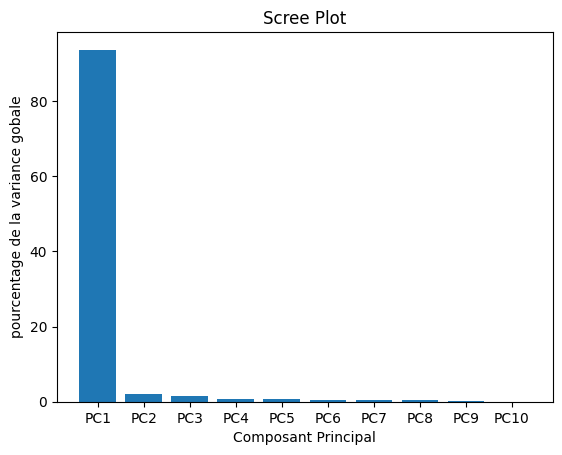

In [67]:
# Construction du Scree plot

plt.bar(x=labels,height=pc_var)
plt.ylabel('pourcentage de la variance gobale')
plt.xlabel('Composant Principal')
plt.title('Scree Plot')
plt.show()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,-9.596847,-0.792106,0.169338,0.316027,-0.995858,-0.314456,-0.942229,1.151279,-0.078938,8.227239e-16
wt2,-9.882126,-0.006259,-2.103962,-0.173586,1.432468,-0.072923,-0.125990,-0.077521,-0.617272,8.227239e-16
wt3,-9.350584,0.224093,2.283449,-0.831100,0.591571,0.007085,1.003550,0.441386,-0.087286,8.227239e-16
wt4,-9.835158,-0.315585,-0.187348,-0.054395,-0.254901,1.586414,-0.238428,-0.553204,0.564805,8.227239e-16
wt5,-9.691648,0.886052,-0.134895,0.684637,-0.802482,-1.223757,0.328506,-0.940379,0.222691,8.227239e-16
ko1,9.485893,3.142048,1.109705,0.387575,0.230250,0.299026,-0.735339,-0.139572,-0.318415,8.227239e-16
ko2,9.791968,1.092427,-1.496788,-0.023506,0.347811,-0.207983,0.498395,0.777238,0.813192,8.227239e-16
ko3,9.969010,-0.311349,-0.831979,-1.464830,-1.410903,0.187219,0.370892,-0.191919,-0.497971,8.227239e-16
ko4,9.450217,-1.792824,0.284156,1.883616,0.025795,0.376289,0.612195,0.021460,-0.331278,8.227239e-16
ko5,9.659275,-2.126497,0.908323,-0.724437,0.836249,-0.636915,-0.771552,-0.488768,0.330472,8.227239e-16


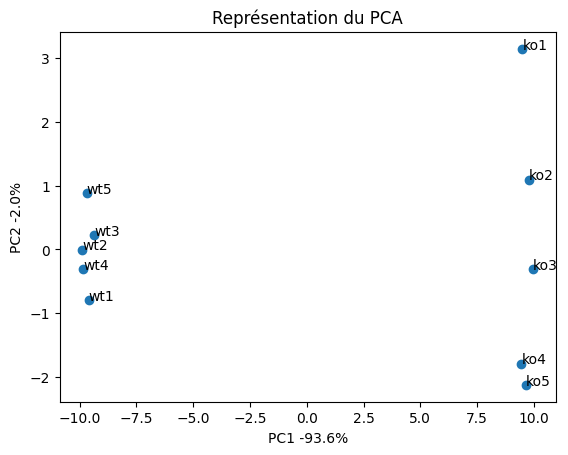

In [74]:
# construction d'un dataframe avec en index les nouvelles données 'scaled' et en colonne les PC's

pca_df= pd.DataFrame(pca_data, index=wt+ko,columns=labels)
display(pca_df)
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('Représentation du PCA')
plt.xlabel('PC1 -{0}%'.format(pc_var[0]))
plt.ylabel('PC2 -{0}%'.format(pc_var[1]))

for x in pca_df.index:
    plt.annotate(x,(pca_df.PC1.loc[x],pca_df.PC2.loc[x]))

plt.show()

In [83]:
loading_scores =pd.Series(pca.components_[0],index=genes)
print(loading_scores)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes]

gene1     -0.102997
gene2     -0.099717
gene3     -0.102902
gene4     -0.032613
gene5      0.103196
             ...   
gene96     0.102608
gene97    -0.098206
gene98     0.103100
gene99     0.103021
gene100   -0.102670
Length: 100, dtype: float64
